In [6]:
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Value
# -----------------------------------
# !pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

In [7]:
Lake = pd.read_csv("Lake_Bilancino.csv")

In [8]:
Lake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


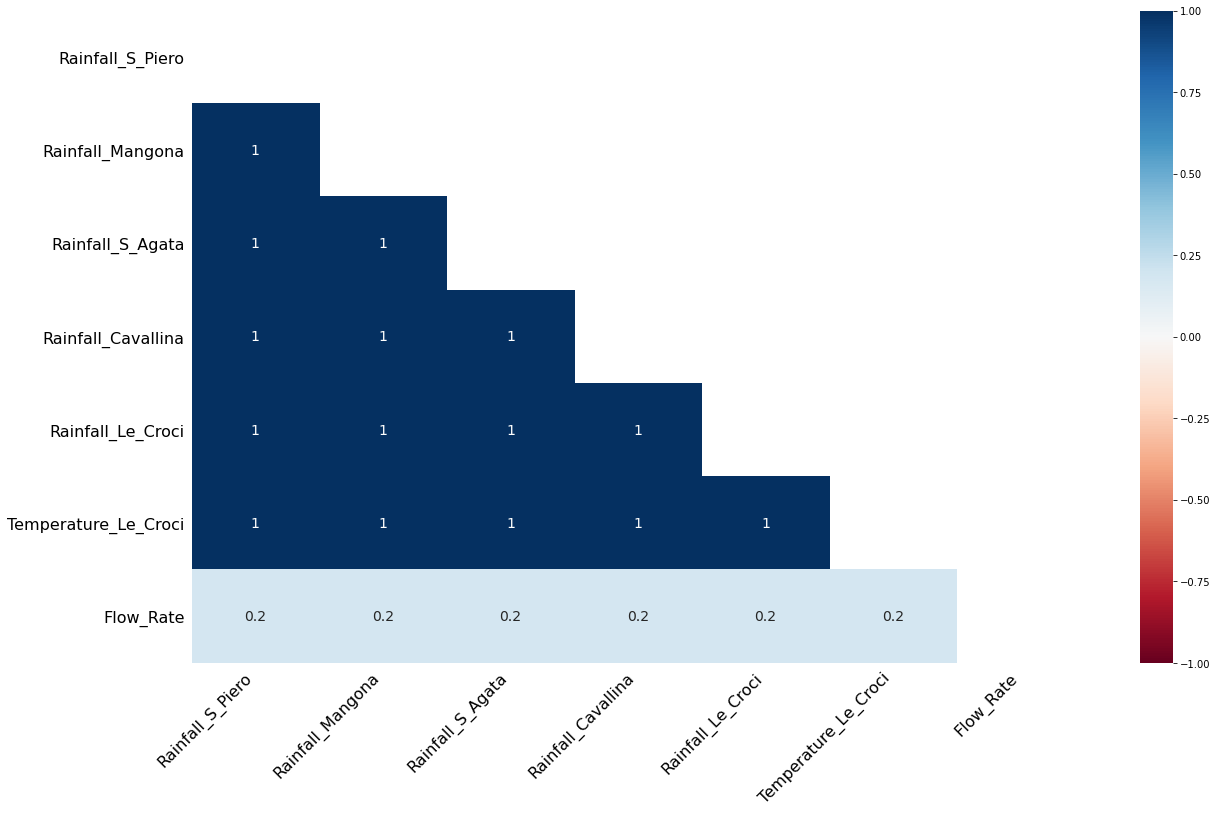

In [9]:
msno.heatmap(Lake)
plt.show()

Lake:
Number of Variables include Missing Values: 7 

                Feature  Num_Missing  Missing_Ratio
0  Temperature_Le_Croci          578           0.09
1      Rainfall_S_Piero          577           0.09
2      Rainfall_Mangona          577           0.09
3      Rainfall_S_Agata          577           0.09
4    Rainfall_Cavallina          577           0.09
5     Rainfall_Le_Croci          577           0.09
6             Flow_Rate           21           0.00 






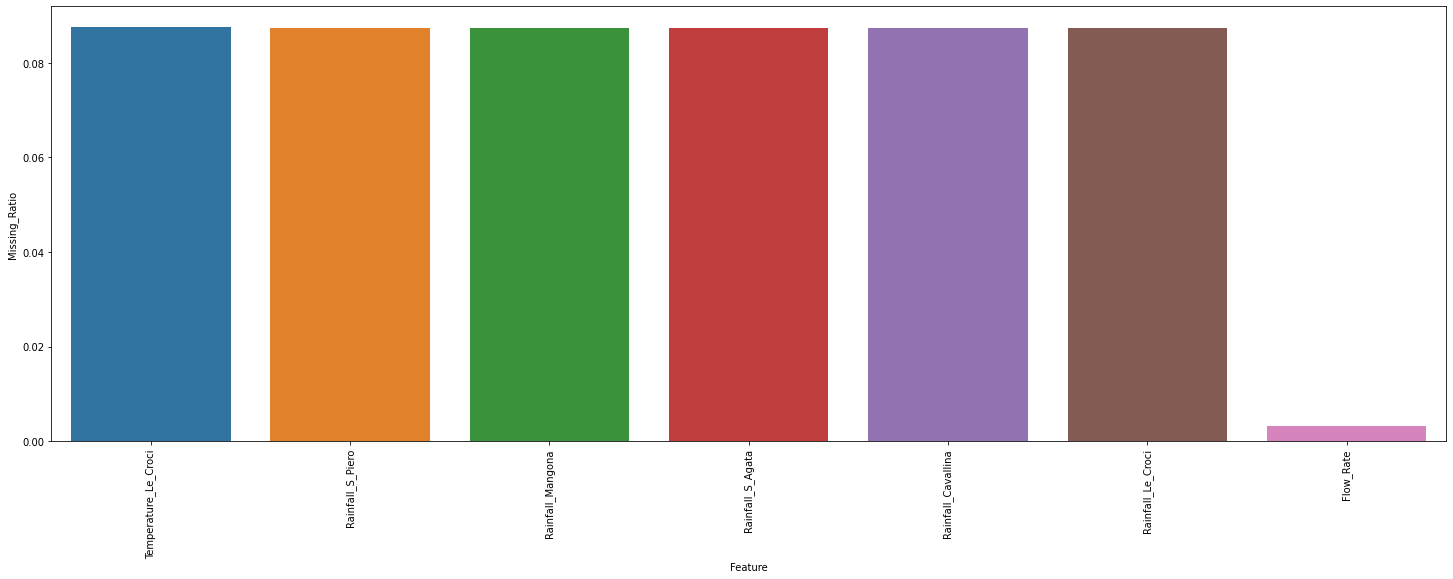

In [16]:
def missing_values(data, plot = False, target = "SalePrice"):
    
    mst = pd.DataFrame({"Num_Missing":data.isnull().sum(), "Missing_Ratio":data.isnull().sum() / data.shape[0]}).sort_values("Num_Missing", ascending = False)
    #mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index":"Feature"}, axis = 1)
    mst = mst[mst.Feature != target]
    
    print("Number of Variables include Missing Values:", mst.shape[0], "\n")
    
    if mst[mst.Missing_Ratio >= 1.0].shape[0] > 0:  
        print("Full Missing Variables:",mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis = 1, inplace = True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize = (25, 8))    
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
            
            
    print(mst, "\n")        
    


print(colored("Lake:", "cyan", attrs=["bold",'reverse', 'blink']))
missing_values(Lake, plot = True, target = "")
print("\n\n")

In [17]:
Lake.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [21]:
Lake[Lake['Flow_Rate'].isnull()==True]

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
175,25/11/2002,nan,nan,nan,nan,nan,nan,251.20,nan
176,26/11/2002,nan,nan,nan,nan,nan,nan,251.10,nan
177,27/11/2002,nan,nan,nan,nan,nan,nan,251.12,nan
178,28/11/2002,nan,nan,nan,nan,nan,nan,251.15,nan
179,29/11/2002,nan,nan,nan,nan,nan,nan,251.19,nan
180,30/11/2002,nan,nan,nan,nan,nan,nan,251.22,nan
181,01/12/2002,nan,nan,nan,nan,nan,nan,251.37,nan
189,09/12/2002,nan,nan,nan,nan,nan,nan,251.24,nan
190,10/12/2002,nan,nan,nan,nan,nan,nan,251.22,nan
191,11/12/2002,nan,nan,nan,nan,nan,nan,251.21,nan


In [22]:
Lake_na = Lake.dropna() 

In [23]:
Lake_na.isnull().sum()

Date                    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64

In [24]:
Lake_na['date'] = Lake_na['Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
y = Lake_na.iloc[0]['date'].year
#Lake_na['year-month'] = Lake_na['date'].apply(lambda x: int((x.year-y)*12+x.month))
Lake_na['month/day'] = Lake_na['date'].apply(lambda x:str(x.month) + "/" + str(x.day))
#Lake_na['year'] = Lake_na['date'].apply(lambda x: int(x.year))
Lake_na['month'] = Lake_na['date'].apply(lambda x: int(x.month))
Lake_na['day'] = Lake_na['date'].apply(lambda x: int(x.day))

In [25]:
Lake_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   object        
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
 9   date                  6025 non-null   datetime64[ns]
 10  month/day             6025 non-null   object        
 11  month                 6025 non-null   int64         
 12  day                   6025 non-null   int64         
dtypes: datetime64[ns

In [75]:
Lake_na['Spring'] = 0
Lake_na['Summer'] = 0
Lake_na['Autumn'] = 0
Lake_na['Winter'] = 0

In [82]:
Lake_na.loc[np.logical_and(3 <= Lake_na['month'], Lake_na['month'] <= 5), 'Spring'] = 1
Lake_na.loc[np.logical_and(6 <= Lake_na['month'], Lake_na['month'] <= 8), 'Summer'] = 1
Lake_na.loc[np.logical_and(9 <= Lake_na['month'], Lake_na['month'] <= 11), 'Autumn'] = 1
Lake_na.loc[np.logical_and(12 == Lake_na['month'], Lake_na['month'] <= 2), 'Winter'] = 1

In [83]:
Lake_na.head(100)

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,date,month/day,month,day,Spring,Summer,Autumn,Winter
0,02/01/2004,0.00,0.00,0.00,0.00,0.00,6.50,251.21,0.50,2004-01-02,1/2,1,2,0,0,0,1
1,03/01/2004,0.00,0.00,0.00,0.00,0.00,4.45,251.28,0.50,2004-01-03,1/3,1,3,0,0,0,1
2,04/01/2004,0.00,0.00,0.00,0.00,0.00,2.00,251.35,0.50,2004-01-04,1/4,1,4,0,0,0,1
3,05/01/2004,0.20,0.00,0.00,0.00,0.00,0.90,251.37,0.50,2004-01-05,1/5,1,5,0,0,0,1
4,06/01/2004,0.00,0.00,0.00,0.00,0.00,2.25,251.42,0.50,2004-01-06,1/6,1,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,06/04/2004,0.20,1.00,0.00,0.00,0.00,12.40,251.82,0.60,2004-04-06,4/6,4,6,1,0,0,0
96,07/04/2004,13.40,12.60,11.20,17.00,23.60,10.75,251.84,0.60,2004-04-07,4/7,4,7,1,0,0,0
97,08/04/2004,0.20,0.40,0.00,0.00,0.20,6.50,251.87,0.60,2004-04-08,4/8,4,8,1,0,0,0
98,09/04/2004,7.20,7.40,8.40,8.40,10.40,11.60,251.90,0.60,2004-04-09,4/9,4,9,1,0,0,0


In [84]:
sne = Lake_na[['Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']]

In [85]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(sne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6025 samples in 0.020s...
[t-SNE] Computed neighbors for 6025 samples in 0.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6025
[t-SNE] Computed conditional probabilities for sample 2000 / 6025
[t-SNE] Computed conditional probabilities for sample 3000 / 6025
[t-SNE] Computed conditional probabilities for sample 4000 / 6025
[t-SNE] Computed conditional probabilities for sample 5000 / 6025
[t-SNE] Computed conditional probabilities for sample 6000 / 6025
[t-SNE] Computed conditional probabilities for sample 6025 / 6025
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.968224
[t-SNE] KL divergence after 300 iterations: 2.135794


In [86]:
tsne_re = pd.DataFrame(tsne_results, columns=['SNE1','SNE2'])

In [87]:
tsne_re.reset_index(drop=True, inplace=True)
Lake_na.reset_index(drop=True, inplace=True)

In [104]:
result1 = pd.concat([tsne_re, Lake_na], axis=1)

In [106]:
arno = pd.read_csv('River_Arno.csv')
arno_level=arno.iloc[2192:,-1]

result1.reset_index(drop=True, inplace = True)
arno_level.reset_index(drop=True, inplace = True)
result = pd.concat([result1,arno_level],axis=1)

In [107]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SNE1                       6025 non-null   float32       
 1   SNE2                       6025 non-null   float32       
 2   Date                       6025 non-null   object        
 3   Rainfall_S_Piero           6025 non-null   float64       
 4   Rainfall_Mangona           6025 non-null   float64       
 5   Rainfall_S_Agata           6025 non-null   float64       
 6   Rainfall_Cavallina         6025 non-null   float64       
 7   Rainfall_Le_Croci          6025 non-null   float64       
 8   Temperature_Le_Croci       6025 non-null   float64       
 9   Lake_Level                 6025 non-null   float64       
 10  Flow_Rate                  6025 non-null   float64       
 11  date                       6025 non-null   datetime64[ns]
 12  month/

In [108]:
result.isnull().sum()

SNE1                         0
SNE2                         0
Date                         0
Rainfall_S_Piero             0
Rainfall_Mangona             0
Rainfall_S_Agata             0
Rainfall_Cavallina           0
Rainfall_Le_Croci            0
Temperature_Le_Croci         0
Lake_Level                   0
Flow_Rate                    0
date                         0
month/day                    0
month                        0
day                          0
Spring                       0
Summer                       0
Autumn                       0
Winter                       0
Hydrometry_Nave_di_Rosano    3
dtype: int64

In [111]:
FinalLake = result.drop(['Date','Flow_Rate','Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci','month/day','month','day','date'],axis=1)
FinalFlow = result.drop(['Date','Lake_Level'],axis=1)

In [112]:
from pycaret.regression import * 

exp_reg = setup(FinalLake,target='Lake_Level',session_id=13, remove_outliers=False,use_gpu=True)
set_config('seed', 123)

,Description,Value
0,session_id,13
1,Target,Lake_Level
2,Original Data,"(6025, 9)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4217, 8)"


In [113]:
bestLake = compare_models(exclude = ['ransac'], n_select = 3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.9398,1.6812,1.2952,0.6403,0.0052,0.0038,3.4760
lightgbm,Light Gradient Boosting Machine,0.9493,1.7349,1.3159,0.6290,0.0053,0.0038,0.1990
gbr,Gradient Boosting Regressor,0.9650,1.7545,1.3234,0.6247,0.0053,0.0039,0.3920
et,Extra Trees Regressor,0.9603,1.7764,1.3307,0.6203,0.0053,0.0039,1.2250
rf,Random Forest Regressor,0.9638,1.8131,1.3449,0.6124,0.0054,0.0039,1.1240
xgboost,Extreme Gradient Boosting,0.9951,1.8760,1.3681,0.5985,0.0055,0.0040,1.1760
ridge,Ridge Regression,1.1224,2.3256,1.5240,0.5023,0.0061,0.0045,0.0110
lar,Least Angle Regression,1.1223,2.3256,1.5239,0.5023,0.0061,0.0045,0.0160
br,Bayesian Ridge,1.1225,2.3256,1.5240,0.5023,0.0061,0.0045,0.0130
lr,Linear Regression,1.1223,2.3256,1.5239,0.5023,0.0061,0.0045,0.0080


In [114]:
cat = create_model('catboost', fold = 5, round = 2) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.96,1.76,1.33,0.63,0.01,0.00
1,0.95,1.71,1.31,0.64,0.01,0.00
2,0.93,1.71,1.31,0.63,0.01,0.00
3,0.97,1.69,1.30,0.65,0.01,0.00
4,0.93,1.64,1.28,0.63,0.01,0.00
Mean,0.95,1.70,1.31,0.64,0.01,0.00
SD,0.01,0.04,0.01,0.01,0.00,0.00


In [115]:
tuned_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9165,1.6198,1.2727,0.6619,0.0051,0.0037
1,1.0283,2.0368,1.4272,0.5700,0.0057,0.0041
2,0.9315,1.5871,1.2598,0.6563,0.0050,0.0037
3,0.9861,1.8380,1.3557,0.6285,0.0054,0.0040
4,0.9651,1.7214,1.3120,0.6461,0.0053,0.0039
5,0.9090,1.6232,1.2740,0.6297,0.0051,0.0037
6,0.9712,1.7512,1.3233,0.6245,0.0053,0.0039
7,0.9661,1.6161,1.2713,0.6710,0.0051,0.0039
8,0.9045,1.5053,1.2269,0.6513,0.0049,0.0036
9,0.9611,1.8063,1.3440,0.6008,0.0054,0.0039


In [64]:
bagged_dt = ensemble_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0467,2.1707,1.4733,0.5371,0.0059,0.0042
1,1.2168,2.8769,1.6961,0.3821,0.0068,0.0049
2,1.0708,2.2823,1.5107,0.5128,0.0061,0.0043
3,1.1264,2.4693,1.5714,0.4954,0.0063,0.0045
4,1.1225,2.3876,1.5452,0.5101,0.0062,0.0045
5,1.0441,2.0623,1.4361,0.5047,0.0058,0.0042
6,1.1312,2.4903,1.5781,0.4645,0.0063,0.0045
7,1.0721,2.2423,1.4974,0.5383,0.0060,0.0043
8,1.0338,2.0272,1.4238,0.5285,0.0057,0.0042
9,1.0842,2.3914,1.5464,0.4681,0.0062,0.0044


In [66]:
blender_top3 = blend_models(bestLake)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0074,2.0688,1.4383,0.5589,0.0058,0.0041
1,1.2113,2.9412,1.7150,0.3682,0.0069,0.0049
2,1.0358,2.2095,1.4864,0.5284,0.0060,0.0042
3,1.0979,2.4468,1.5642,0.5000,0.0063,0.0044
4,1.0929,2.3263,1.5252,0.5227,0.0061,0.0044
5,1.0211,2.0570,1.4342,0.5060,0.0057,0.0041
6,1.1065,2.4111,1.5528,0.4816,0.0062,0.0044
7,1.0573,2.2085,1.4861,0.5453,0.0060,0.0043
8,1.0449,2.1129,1.4536,0.5085,0.0058,0.0042
9,1.0754,2.3408,1.5300,0.4793,0.0061,0.0043


In [67]:
stacker = stack_models(bestLake)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:28:07
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


KeyboardInterrupt: 

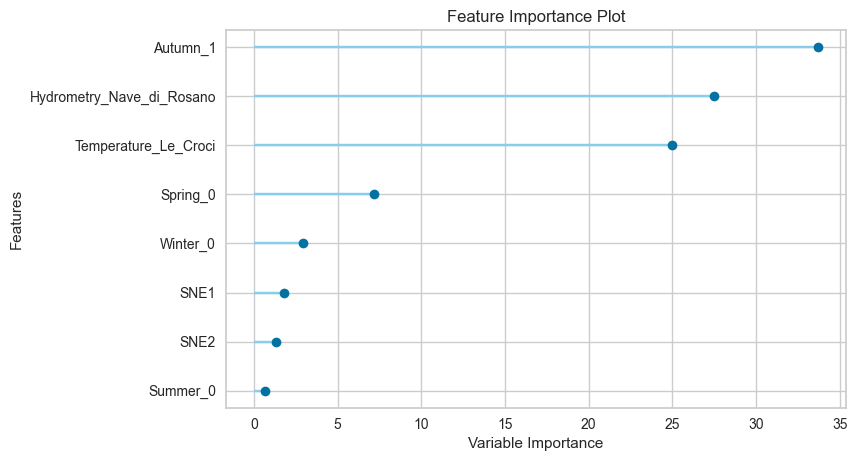

In [116]:
plot_model(tuned_cat, plot='feature')